In [116]:
import yfinance as yf
import pandas as pd
import numpy as np
import math

#Assume purchased shares on Daily Open
#Value based on value at open
cash = 1000


# List of stock tickers
tickers = ['NVDL', 'BITX', 'BITO', 'FNGU', 'UPRO', 'SPMO', 'BULZ', 'TQQQ', 'SMH', 'XMMO', 'EPI']#, 'QDV5'
#tickers = ['VOO', 'IVV',  'SPLG', 'SPY']#, 'BITX', 'NVDL'


dfGlobal = []

globalMap = {}

# List to hold dataframes
dfs = {}

# Fetch data for each ticker

for ticker in tickers:
    print(f"Downloading data for {ticker}...")
    data = yf.download(ticker, start="2020-01-01", end="2024-07-01")

    #cash only at first day of every month, else 0
    data['Cash'] = np.where(data.index.day == 14, cash, 0)
    
    data['Total Invested'] = data['Cash'].cumsum()
    data['Shares Purchased'] = np.floor(data['Cash']/np.ceil(data['Open']))
    data['Shares Owned'] = data['Shares Purchased'].cumsum()
    data['Value'] = round(data['Shares Owned'] * data['Open'], 2)
    data['Profit'] = data['Value'] - data['Total Invested']
    data['Profit %'] = round(data['Profit'] / data['Total Invested'] * 100, 2)  
    dfGlobal.append(data)  # Append the dataframe to the list
    globalMap[ticker] = data.reset_index()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

In [120]:
#globalMap['NVDL'][['Open', 'Profit %']].corr()

,Open,Profit %
Open,1.000000,0.991864
Profit %,0.991864,1.000000


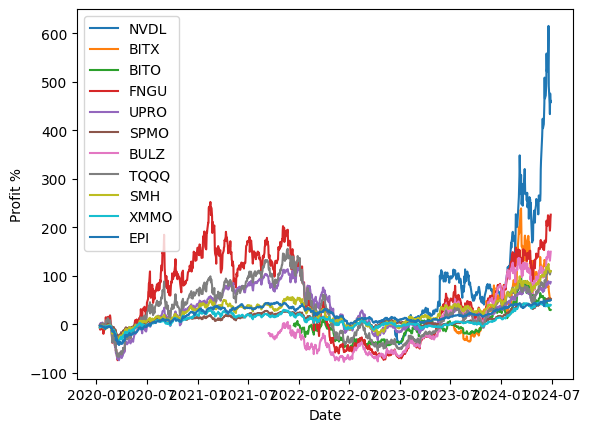

In [121]:
import matplotlib.pyplot as plt
# import seaborn as sns


#graph profits of each stock
for ticker in tickers:
    data = globalMap[ticker]
    plt.plot(data['Date'], data['Profit %'], label=ticker)
    plt.legend(labels=tickers)
    plt.xlabel('Date')
    plt.ylabel('Profit %')


#globalMap['NVDL']